In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from ito_diffusions import ContainedBM
plt.style.use('dark_background')

In [2]:
params = {
    'font.size': 14,
    'figure.figsize': (11, 18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

## Contained Brownian motion

The intuition here is to build a process with the same covariance function as the Brownian motion but which is contained between two bounds. As the vol is prescribed, the only degree of freedom is the drift, which needs to be repulsive at the boundaries. One suggestion is:
$$
dX_t = \kappa (\frac{1}{X_t^\beta} - \frac{1}{(1-X_t)^\beta}) dt + \sigma dW_t
$$
where $\kappa>0$, $\sigma>0$, $\beta>0$. This way, we hope that $X_t \in I = [0, 1]$ a.s for all $t<T$ where $T$ is a possibly finite explosion time.

To determine whether this process actually explodes (which in practice would translate into numerical instabilities and a premature end to the simulation), one may use the Feller test (see Karatzas & Shreve Theorem 5.5.29). Note that, given the lack of regularity, in particular of Lipschitz continuity and sublinear growth, the equation for $X$ may not have strong solutions, but only weak ones.

For $x\in I$, let:
$$
p(x) = \int_c^x e^{-2\int_c^y \frac{b(z)}{\sigma^2(z)}dz} dy
$$
where $c\in I$ is an arbitrary constant (the value of which does not matter for the end result), $b$ and $\sigma$ the drift and volatility function respectively. Let also :

$$
v(x) = \int_c^x p'(y) \int_c^y \frac{2}{p'(z)\sigma^2(z)}dz dy.
$$

The Feller test states that $\lim_{x\rightarrow 0^+} v(x) = \lim_{x\rightarrow 1^-} v(x) = +\infty$ implies $T=\infty$ a.s, where $T$ is the explosion time (formally it is the limit of the escape time of $X$ from a sequence of compact intervals covering $I$). 

(One can wonder why bother with the definition of $p$ since the criterion only uses $p'$ : stronger version of the test investigates the case where one or both limits are not $+\infty$, in which case the values of $p$ itself at the boundaries become important).

A rather tedious integral estimation yields the following property:

* if $\beta>1$, then the weak solution $X$ a.s does not explode in finite time,
* if $\beta<1$, then it may explode in finite time.

This is quite intuitive: the higher the exponent $\beta$, the stronger the repulsion at the boundaries, which prevents $X$ to just crash on it.

The goal of this notebook, besides stating this theoretical results, the verification of which is left to the brave enough readers, is to exhibit the crashing behaviour of $X$ for small values of $\beta$ as well as showcasing that $\beta>>1$ (for numerical stability, values too close to $1$ may remain problematic because of the discretization) gives suitably contained process.

In [3]:
T = 1.0
SCHEME_STEPS = int(1e4)
sigma = 2.0
kappa = 1.0
lo = 0.0
hi = 1.0

/home/patricksaux/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ito_diffusions/ito_diffusion_1d.py:728: RuntimeWarning: invalid value encountered in double_scalars
  1 / (x - self.lo) ** self.beta - 1 / (self.hi - x) ** self.beta


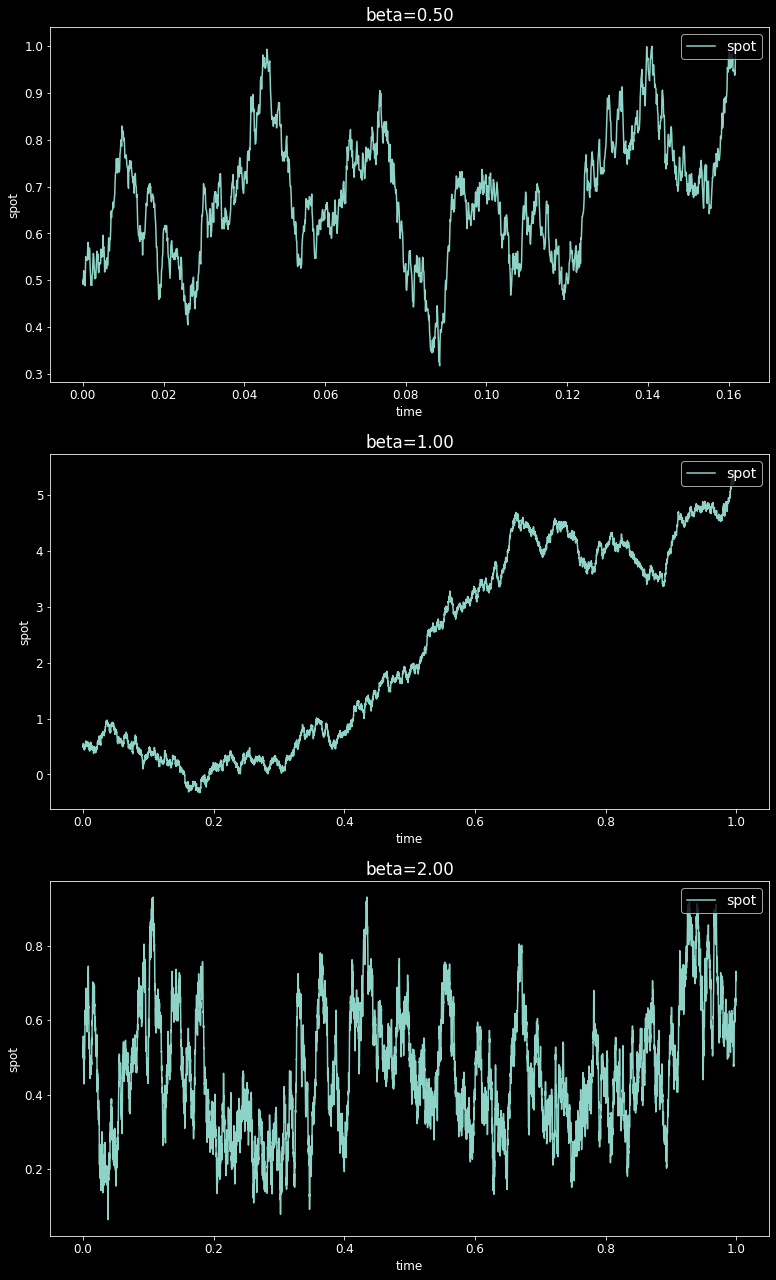

In [4]:
fig, axes = plt.subplots(nrows=3, ncols=1)

betas = [0.5, 1.0, 2.0]

X = ContainedBM(
    x0=0.5,
    T=T,
    scheme_steps=SCHEME_STEPS,
    kappa=kappa,
    sigma=sigma,
    lo=lo,
    hi=hi,
)

for i, ax in enumerate(axes):
    beta = betas[i]
    X.beta = beta
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_title('beta={:.2f}'.format(beta))
    ax.set_xlabel('time')
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()